In [30]:
import pyreadstat
import pandas as pd
import numpy as np

from semopy import Model
from semopy.examples import multivariate_regression
from semopy import semplot
import semopy

In [31]:
semopy.examples.political_democracy.get_data()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [25]:
data = multivariate_regression.get_data()
data

,y1,y2,y3,x1,x2,x3
0,-1.989468,-0.015637,-0.162064,-0.086448,-0.728435,-0.158917
1,-0.777919,4.919949,1.222909,-0.722815,-0.552797,-2.290903
2,-1.951388,1.024939,2.402742,0.127013,0.796024,-0.040658
3,-2.084306,1.430075,-0.308923,0.317103,-0.015630,0.915825
4,1.729722,-3.632137,-2.926315,0.129123,-1.922594,1.652257
...,...,...,...,...,...,...
95,-3.850754,0.661794,-0.555356,-0.086717,0.636323,0.861046
96,-1.180733,1.595003,1.175348,-0.648488,-0.045442,-0.328253
97,0.658198,2.713970,2.133264,0.085195,-0.703850,-1.978876
98,-0.319996,2.372079,1.515024,0.510689,-0.335403,-1.551753


In [26]:
data['x2'].iloc[1:4] = 0

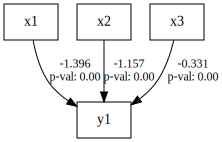

In [27]:
model2 = '''
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

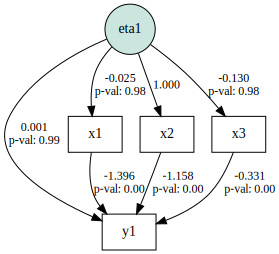

In [28]:
model2 = '''
#latent definition
eta1 =~ x2 + x3 + x1 + y1

#structure
y1 ~ x1 + x2 + x3
'''

semModel = Model(model2)
semModel.fit(data)
semModel.inspect()

semplot(semModel,"model.png",plot_covs=True)

In [5]:
model1 = '''
#latent definition
eta1 =~ y2 + y3
eta2 =~ x2 + x3 + x1
eta3, eta4 =~ y1

#structure
eta3 ~ x1 + x2 + x3
eta4 ~ y2 + y3

#additional covariance
eta3 ~~ eta4
'''

In [6]:
semModel = Model(model1)
semModel.fit(data)
semModel.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,y2,~,eta1,1.000000,-,-,-
1,y3,~,eta1,1.222699,0.165252,7.398989,0.0
2,x2,~,eta2,1.000000,-,-,-
3,x3,~,eta2,-1.214710,0.234795,-5.173487,0.0
4,x1,~,eta2,0.401676,0.108906,3.68827,0.000226
5,eta3,~,x1,-1.534564,0.082096,-18.692254,0.0
6,eta3,~,x2,-0.944997,0.182158,-5.187775,0.0
7,eta3,~,x3,-0.523924,0.149747,-3.498729,0.000467
8,eta4,~,y2,-0.187727,0.054655,-3.434757,0.000593
9,eta4,~,y3,0.006857,0.103567,0.066212,0.947209


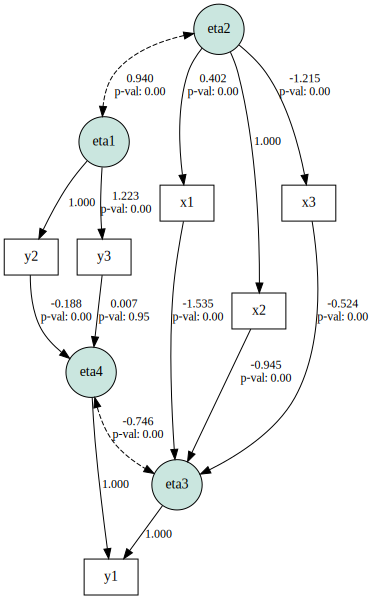

In [7]:
semplot(semModel,"model.png",plot_covs=True)

In [8]:
df, meta = pyreadstat.read_dta('anes_timeseries_2012.dta')

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.to_csv('data.csv')